VARIABLE       DESCRIPTION            KEY

survival 	   Survival 	          0 = No, 1 = Yes
pclass 	       Ticket class 	      1 = 1st, 2 = 2nd, 3 = 3rd
sex 	       Sex 	
Age 	       Age in years 	
sibsp 	       # of siblings / spouses aboard the Titanic 	
parch 	       # of parents / children aboard the Titanic 	
ticket 	       Ticket number 	
fare 	       Passenger fare 	
cabin 	       Cabin number 	
embarked 	   Port of Embarkation 	  C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes

pclass: A proxy for socio-economic status (SES)
1st    = Upper
2nd    = Middle
3rd    = Lower

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

1 : LOADING DATA

In [3]:
df=pd.read_csv('titanic_data.csv')

2 : DATA OVERVIEW AND INFORMATION

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3 : DATA CLEANING

NULL VALUES

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
null_size=df['Age'].isnull().sum()
mean_age=df['Age'].mean()
std_age=df['Age'].std()
null_size,mean_age,std_age

(177, 29.69911764705882, 14.526497332334042)

In [9]:
random_age=np.random.randint(mean_age-std_age,mean_age+std_age,size=null_size)
random_age

array([27, 16, 22, 41, 19, 38, 16, 34, 34, 33, 41, 39, 37, 26, 28, 35, 22,
       15, 41, 29, 38, 37, 23, 26, 19, 19, 20, 22, 24, 37, 22, 33, 16, 34,
       20, 17, 32, 23, 39, 25, 19, 21, 24, 39, 23, 40, 37, 35, 25, 34, 23,
       16, 37, 25, 33, 42, 31, 31, 22, 34, 28, 16, 22, 40, 40, 18, 32, 26,
       17, 41, 33, 27, 37, 16, 21, 17, 39, 18, 42, 33, 32, 23, 20, 22, 16,
       23, 20, 42, 28, 40, 41, 33, 17, 22, 19, 27, 24, 22, 38, 28, 22, 36,
       22, 34, 23, 38, 21, 33, 20, 33, 43, 19, 23, 38, 23, 15, 29, 32, 40,
       37, 25, 39, 35, 21, 26, 39, 21, 17, 29, 43, 43, 17, 27, 40, 27, 30,
       20, 16, 43, 43, 18, 18, 32, 25, 23, 27, 26, 26, 40, 32, 37, 19, 19,
       41, 19, 41, 22, 41, 33, 43, 26, 22, 38, 30, 36, 24, 16, 42, 32, 18,
       20, 26, 22, 18, 25, 36, 43])

In [10]:
Age_copy=df['Age'].copy()
Age_copy[np.isnan(Age_copy)]=random_age
df["Age"]=Age_copy.copy()
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    43.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
df['Age'].isnull().sum()

0

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
df['Embarked']=df['Embarked'].fillna('S')

In [15]:
df['Embarked'].isnull().sum()

0

DROPPING UNWANTED COLUMNS

In [16]:
drop_columns=['PassengerId','Name','Ticket','Cabin']
df.drop(drop_columns,axis=1,inplace=True)

In [17]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
54,0,1,male,65.00,0,1,61.9792,C
644,1,3,female,0.75,2,1,19.2583,C
442,0,3,male,25.00,1,0,7.7750,S
280,0,3,male,65.00,0,0,7.7500,Q
495,0,3,male,22.00,0,0,14.4583,C


4 : Exploratory Data Analysis

Sex vs Survival

In [18]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


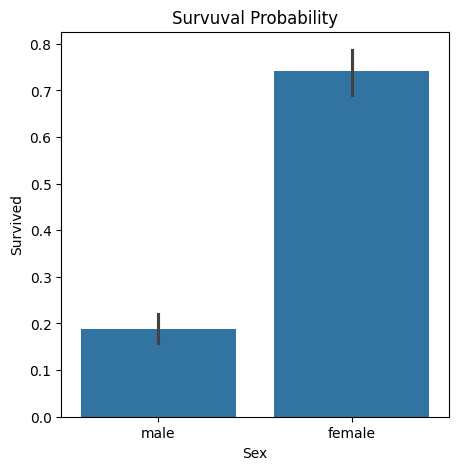

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x="Sex",y="Survived",data=df)
plt.title("Survuval Probability")
plt.show()

SURVIVED

<Axes: ylabel='count'>

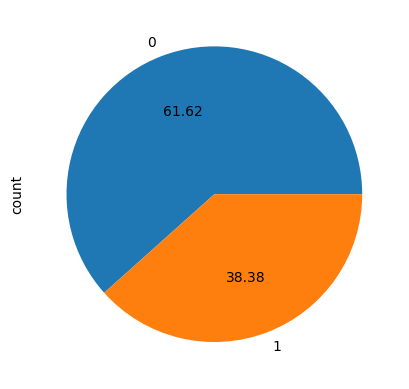

In [21]:
df['Survived'].value_counts().plot(kind='pie',autopct="%.2f")

AGE vs Survival

In [22]:
df[['Age','Survived']].groupby('Age').mean().sample(10)

,Survived
Age,
66.00,0.000000
4.00,0.700000
11.00,0.250000
29.00,0.391304
0.92,1.000000
30.00,0.370370
24.00,0.441176
24.50,0.000000
5.00,1.000000


<Axes: xlabel='Age', ylabel='Survived'>

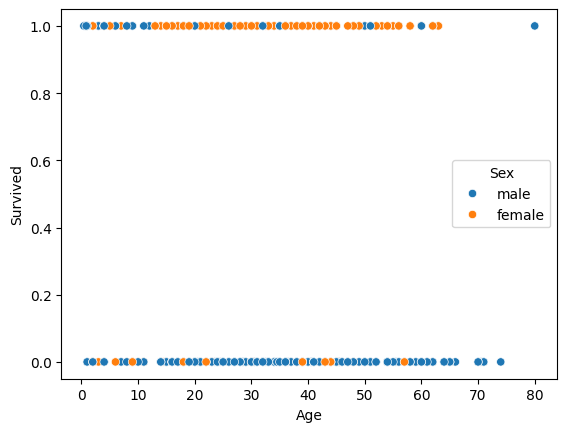

In [23]:
sns.scatterplot(x="Age",y="Survived",data=df,hue="Sex")

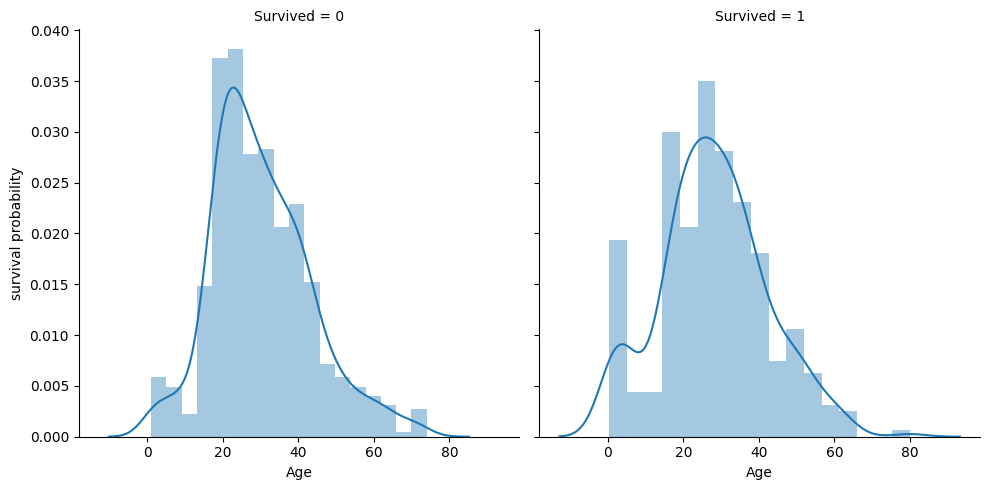

In [24]:
age_visual = sns.FacetGrid(df, col = 'Survived',height=5)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

Sibling and Spouse(SibSp) vs Survival

In [25]:
df[['SibSp','Survived']].groupby('Survived').value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: count, dtype: int64

In [26]:
df[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

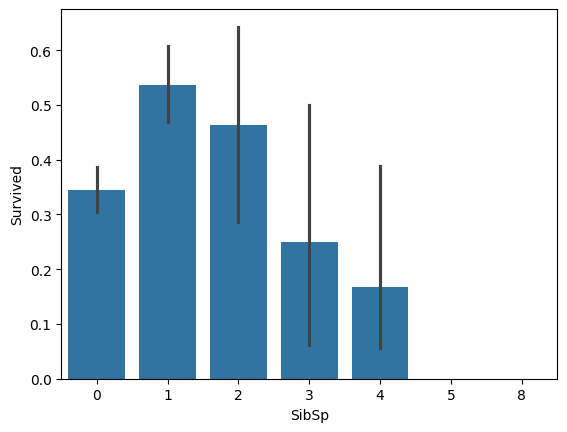

In [27]:
sns.barplot(x='SibSp',y='Survived',data=df)

<Axes: xlabel='SibSp', ylabel='Survived'>

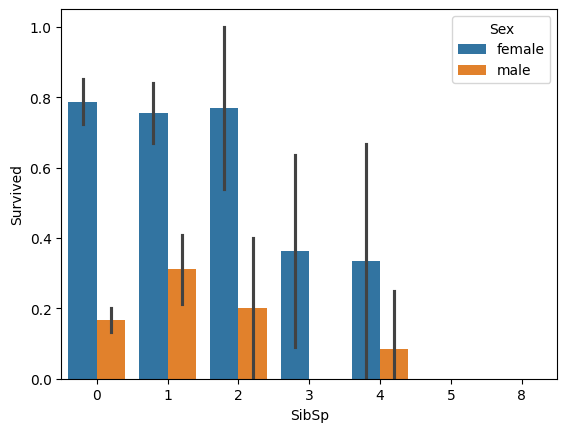

In [28]:
sns.barplot(x='SibSp',y='Survived',data=df,hue='Sex')

Parent and Child vs Survivability

In [29]:
df[['Parch','Survived']].groupby('Survived').value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: count, dtype: int64

In [30]:
df[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

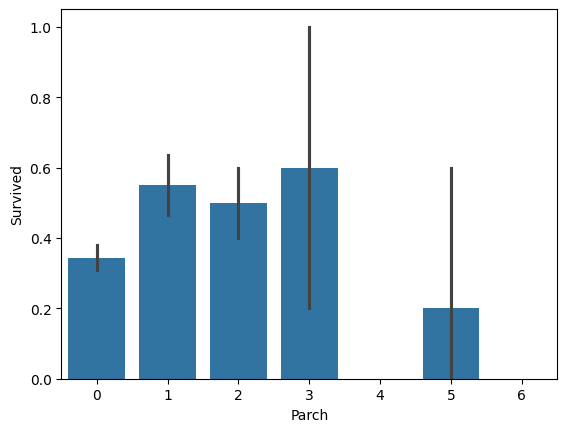

In [31]:
sns.barplot(x='Parch',y='Survived',data=df)

<Axes: xlabel='Parch', ylabel='Survived'>

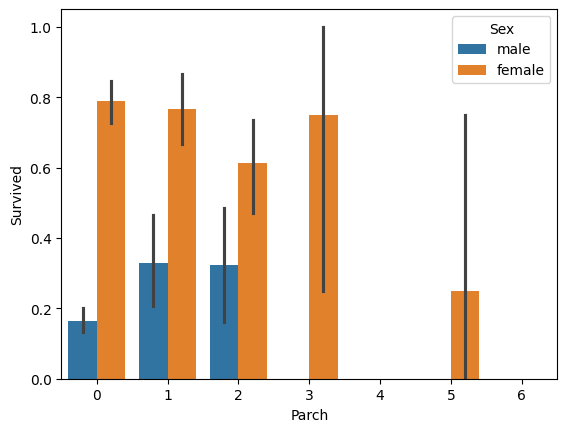

In [32]:
sns.barplot(x='Parch',y='Survived',data=df,hue='Sex')

PClass vs Survivability

In [33]:
df[['Pclass','Survived']].groupby('Pclass').value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [34]:
df[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

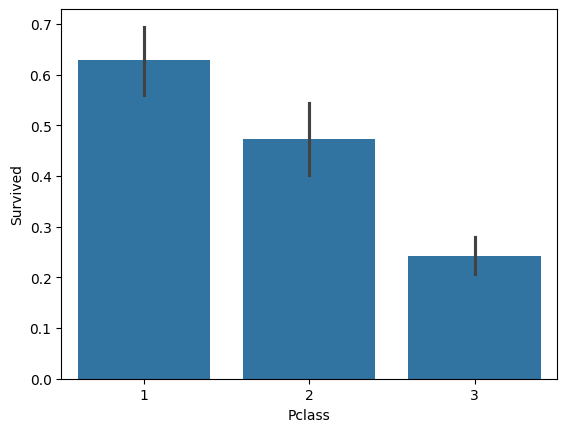

In [35]:
sns.barplot(x='Pclass',y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

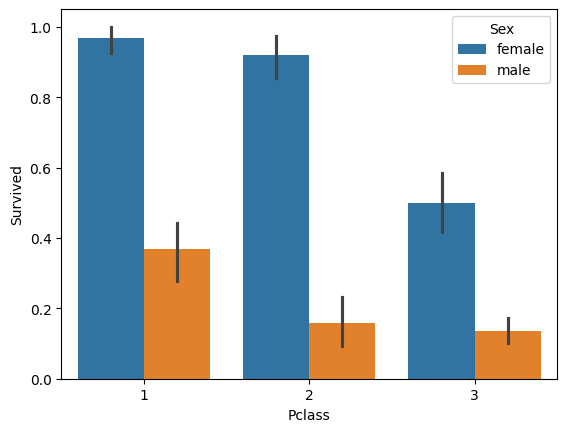

In [36]:
sns.barplot(x='Pclass',y='Survived',data=df,hue='Sex')

EMBARKED vs Survivability

<Axes: xlabel='Embarked', ylabel='Survived'>

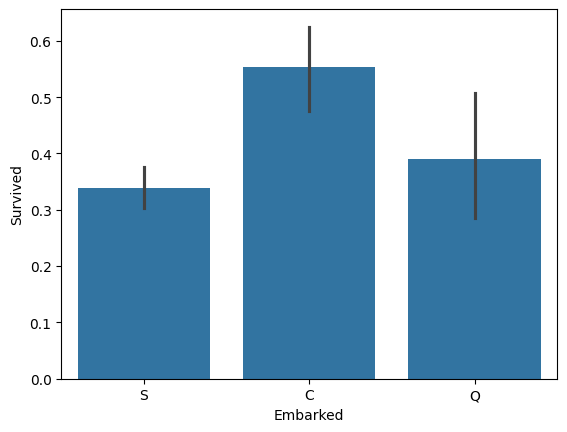

In [37]:
sns.barplot(x='Embarked',y="Survived",data=df)

<Axes: xlabel='Embarked,Pclass'>

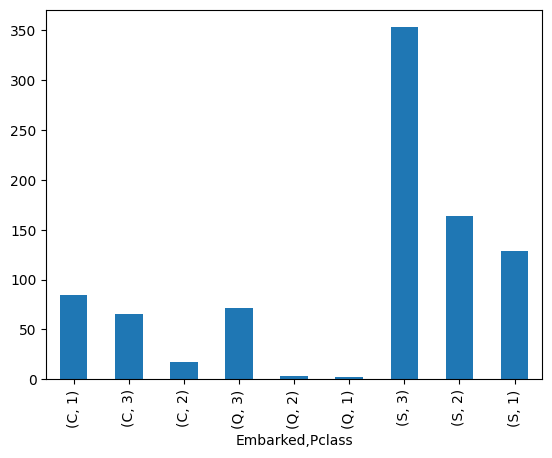

In [38]:
df[['Embarked','Pclass']].groupby('Embarked').value_counts().plot(kind='bar')

<Axes: xlabel='Embarked,Sex,Survived'>

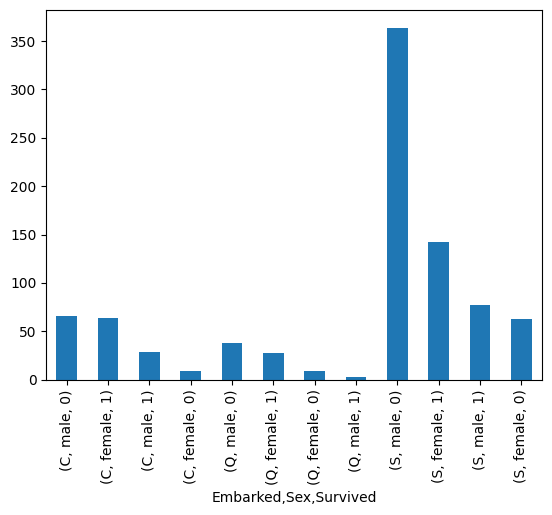

In [39]:
df[['Embarked','Sex','Survived']].groupby('Embarked').value_counts().plot(kind='bar')

Corelation

<Axes: >

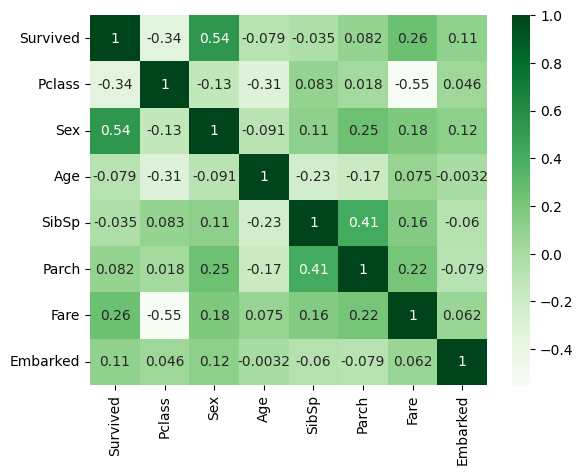

In [68]:
df.corr()
sns.heatmap(df.corr(),annot=True,cmap="Greens")

Machine Learning Model

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

COLUMN MODIFICATION

In [42]:
Gender={'male':0,'female':1}
df['Sex']=df['Sex'].map(Gender)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [44]:
City={'S':1,'C':2,'Q':3}
df['Embarked']=df['Embarked'].map(City)

In [45]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
151,1,1,1,22.0,1,0,66.6000,1
304,0,3,0,16.0,0,0,8.0500,1
105,0,3,0,28.0,0,0,7.8958,1
262,0,1,0,52.0,1,1,79.6500,1
167,0,3,1,45.0,1,4,27.9000,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


SPLITTING DATA

In [47]:
x=df.drop(df.columns[0],axis=1)
y=df['Survived']

In [48]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Scaling of data

In [51]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler()
x_train=x_scaled.fit_transform(x_train)
x_test=x_scaled.transform(x_test)

Classification and Predictions

In [52]:
logistic_reg=LogisticRegression()
dt_classifier=DecisionTreeClassifier()
rf_classifier=RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0)
knn_classifier=KNeighborsClassifier(5)
svc_classifier=SVC()

Training

In [53]:
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)
logistic_reg.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

Prediction

In [54]:
svc_ypred=svc_classifier.predict(x_test)
dt_ypred=dt_classifier.predict(x_test)
rf_ypred=rf_classifier.predict(x_test)
log_ypred=logistic_reg.predict(x_test)
knn_ypred=knn_classifier.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score

In [58]:
svc_accuracy=accuracy_score(y_test,svc_ypred)
dt_accuracy=accuracy_score(y_test,dt_ypred)
rf_accuracy=accuracy_score(y_test,rf_ypred)
log_accuracy=accuracy_score(y_test,log_ypred)
knn_accuracy=accuracy_score(y_test,knn_ypred)

In [59]:
print("Support vector Accuracy : ",round(100*svc_accuracy,2))
print("Decision Tree Accuracy : ",round(100*dt_accuracy,2))
print("Random Forest Accuracy : ",round(100*rf_accuracy,2))
print("Logistic Regression Accuracy : ",round(100*log_accuracy,2))
print("KNN Classifier Accuracy : ",round(100*knn_accuracy,2))

Support vector Accuracy :  81.72
Decision Tree Accuracy :  77.61
Random Forest Accuracy :  82.46
Logistic Regression Accuracy :  80.97
KNN Classifier Accuracy :  80.97
